In [1]:
%pylab inline
import pandas as pd
import scipy.stats as stats
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams['pdf.fonttype']=42
rcParams['font.family']='sans-serif'
rcParams['font.size']=10

In [3]:
def qnorm_dataframe( data ):
    """
    quantile normalize a dataframe with numeric values only!
    """
    rank_mean = data.stack().groupby(data.rank(method='first').stack().astype(int)).mean()
    qnormed_data    = data.rank(method='min').stack().astype(int).map(rank_mean).unstack()
    return qnormed_data

In [4]:
drugsens = pd.read_csv('/Data/HartLab/Drug_sensitivity/primary_replicate_collapsed_logfold_change.csv',
                        index_col=0)
drugsens.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, ACH-000001 to ACH-001321
Columns: 4686 entries, BRD-A00077618-236-07-6::2.5::HTS to BRD-M63173034-001-03-6::2.64076472::MTS004
dtypes: float64(4686)
memory usage: 20.7+ MB


In [5]:
druginfo = pd.read_csv('/Data/HartLab/Drug_sensitivity/primary_replicate_collapsed_treatment_info.csv',
                      index_col=0)
druginfo.fillna('-', inplace=True)
druginfo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4686 entries, BRD-A00055058-001-01-0::2.325889319::MTS004 to BRD-U51753822-000-01-1::2.5::HTS
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   broad_id      4686 non-null   object 
 1   name          4686 non-null   object 
 2   dose          4686 non-null   float64
 3   screen_id     4686 non-null   object 
 4   moa           4686 non-null   object 
 5   target        4686 non-null   object 
 6   disease.area  4686 non-null   object 
 7   indication    4686 non-null   object 
 8   smiles        4686 non-null   object 
 9   phase         4686 non-null   object 
dtypes: float64(1), object(9)
memory usage: 402.7+ KB


In [6]:
drugsens.head()

,BRD-A00077618-236-07-6::2.5::HTS,BRD-A00100033-001-08-9::2.5::HTS,BRD-A00147595-001-01-5::2.5::HTS,BRD-A00218260-001-03-4::2.5::HTS,BRD-A00376169-001-01-6::2.5::HTS,BRD-A00520476-001-07-4::2.5::HTS,BRD-A00546892-001-02-6::2.5::HTS,BRD-A00578795-001-04-3::2.5::HTS,BRD-A00758722-001-04-9::2.5::HTS,BRD-A00827783-001-24-6::2.5::HTS,...,BRD-K98557884-001-01-6::2.5::MTS004,BRD-K99077012-001-01-9::2.332734192::MTS004,BRD-K99199077-001-16-1::2.603211317::MTS004,BRD-K99431849-001-01-7::2.500018158::MTS004,BRD-K99447003-335-04-1::2.37737659::MTS004,BRD-K99506538-001-03-8::2.5::MTS004,BRD-K99616396-001-05-1::2.499991421::MTS004,BRD-K99879819-001-02-1::2.5187366::MTS004,BRD-K99919177-001-01-3::2.5::MTS004,BRD-M63173034-001-03-6::2.64076472::MTS004
ACH-000001,-0.015577,-0.449332,0.489379,0.206675,0.272730,0.021036,-0.025460,0.467158,-0.736306,0.644137,...,0.429238,0.204841,0.150055,-0.575404,-0.101247,0.399233,-0.127658,-0.141651,-1.153652,0.510464
ACH-000007,-0.095730,0.257943,0.772349,-0.438502,-0.732832,0.779201,0.426523,-1.288508,-0.476133,-0.277105,...,-0.471486,0.212998,-0.123230,0.625527,0.383198,0.212031,0.349225,-0.387439,-0.831461,0.323558
ACH-000008,0.379480,-0.596132,0.548056,0.422269,-0.216986,0.081866,0.145335,-0.570841,-0.512119,0.452698,...,-0.111951,0.534787,0.206642,-0.410153,-0.560722,-0.036088,0.158071,0.171043,-3.947090,0.099310
ACH-000010,0.118890,-0.231615,0.621937,-0.202707,-1.005139,-0.213739,0.020246,-0.795278,NaN,0.679571,...,0.200605,-0.075356,0.610310,-0.019413,-0.202971,0.218158,-0.411009,-0.181540,-3.010225,0.090652
ACH-000011,0.145346,-0.499274,0.267470,0.157804,-0.272286,0.207768,0.004464,-0.191680,-0.310375,0.112537,...,-0.076863,0.026002,0.139921,-0.261704,0.085339,0.447482,0.164620,-0.565251,-4.110627,0.222394


In [7]:
bf = pd.read_table('./Data/table_Avana2020Q4_CRISPRcleanR_corrected_all', index_col=0)
qbf = qnorm_dataframe( bf ).T
qbf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 18095 entries, A1BG to ZZZ3
dtypes: float64(18095)
memory usage: 111.6+ MB


In [8]:
feats = pd.read_table('./Data/features-bool-deDuped-2918feats-808cells.txt', index_col=0)
feats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 2918 entries, plasma_cell to CDH_VIM_lo
dtypes: bool(2918)
memory usage: 2.3+ MB


In [9]:
cell_lines_in_gdsc_and_avana = [x for x in qbf.index.values if x in drugsens.index.values]
len(cell_lines_in_gdsc_and_avana)

408

In [10]:
drugsens = drugsens.loc[cell_lines_in_gdsc_and_avana]
qbf = qbf.loc[cell_lines_in_gdsc_and_avana]
feats = feats.loc[cell_lines_in_gdsc_and_avana]

In [11]:
data = qbf.join(drugsens.join(feats, how='inner'), how='inner')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408 entries, ACH-001145 to ACH-000845
Columns: 25699 entries, A1BG to CDH_VIM_lo
dtypes: bool(2918), float64(22781)
memory usage: 72.1+ MB


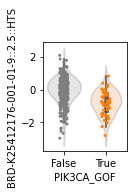

broad_id                                   BRD-K25412176-001-01-9
name                                                   GSK2110183
dose                                                          2.5
screen_id                                                     HTS
moa                                                 AKT inhibitor
target                                           AKT1, AKT2, AKT3
disease.area                                                    -
indication                                                      -
smiles          Cn1ncc(Cl)c1-c1cc(sc1Cl)C(=O)N[C@H](CN)Cc1cccc...
phase                                                     Phase 2
Name: BRD-K25412176-001-01-9::2.5::HTS, dtype: object

In [18]:
gene = 'PIK3CA'
drug = 'BRD-K25412176-001-01-9::2.5::HTS' # akti
condition = 'PIK3CA_GOF'

my_order = [False,True]

my_palette = {True: sns.color_palette("tab10")[1], False: sns.color_palette("tab10")[7]}

figure( figsize(1.5,2))
ax = sns.violinplot( x=condition, y=drug, data=data, order=my_order, palette=my_palette)
for violin in ax.collections[::2]:
    violin.set_alpha(0.2)

sns.stripplot( x=condition, y=drug, data=data, s=3, order=my_order, palette=my_palette)

savefig('./Figures/Fig_4_I.pdf')
savefig('./Figures/Fig_4_I.png')
show()
druginfo.loc[drug]

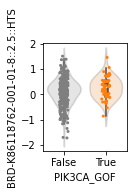

broad_id                                   BRD-K86118762-001-01-8
name                                                   linsitinib
dose                                                          2.5
screen_id                                                     HTS
moa                                               IGF-1 inhibitor
target                                         IGF1R, INSR, INSRR
disease.area                                                    -
indication                                                      -
smiles          C[C@@]1(O)C[C@@H](C1)c1nc(-c2ccc3ccc(nc3c2)-c2...
phase                                                     Phase 3
Name: BRD-K86118762-001-01-8::2.5::HTS, dtype: object

In [19]:
gene = 'IGF1R'
drug = 'BRD-K86118762-001-01-8::2.5::HTS' #igf1r-i
condition = 'PIK3CA_GOF'

my_order = [False,True]

my_palette = {True: sns.color_palette("tab10")[1], False: sns.color_palette("tab10")[7]}

figure( figsize(1.5,2))
ax = sns.violinplot( x=condition, y=drug, data=data, order=my_order, palette=my_palette)
for violin in ax.collections[::2]:
    violin.set_alpha(0.2)
sns.stripplot( x=condition, y=drug, data=data, s=3, order=my_order, palette=my_palette)

savefig('./Figures/Fig_4_J.pdf')
savefig('./Figures/Fig_4_J.png')
show()
druginfo.loc[drug]

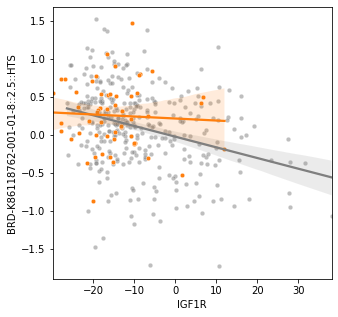

In [20]:
#
# IGF1R drug: BRD-K68065987-300-09-1::2.5::HTS
#

gene = 'IGF1R'
drug = 'BRD-K86118762-001-01-8::2.5::HTS' # IGF1R-i
condition = 'PIK3CA_GOF'

figure( figsize(5,5))
sns.scatterplot( x=gene, y=drug, data=data[ data[condition]==False], 
            color=sns.color_palette("tab10")[7], s=20, alpha=.5)
sns.scatterplot( x=gene, y=drug, data=data[ data[condition]==True], 
            color=sns.color_palette("tab10")[1], s=20)
sns.regplot( x=gene, y=drug, data=data[ data[condition]==False], 
            color=sns.color_palette("tab10")[7],
           scatter=False)
sns.regplot( x=gene, y=drug, data=data[ data[condition]==True], 
            color=sns.color_palette("tab10")[1], 
            scatter=False)
#savefig('./Figures/Fig_4_K.pdf')
#savefig('./Figures/Fig_4_K.png')
show()

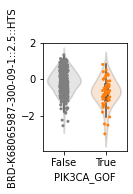

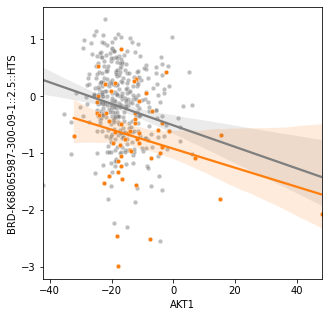

broad_id                                   BRD-K68065987-300-09-1
name                                                      MK-2206
dose                                                          2.5
screen_id                                                     HTS
moa                                                 AKT inhibitor
target                                           AKT1, AKT2, AKT3
disease.area                                                    -
indication                                                      -
smiles          NC1(CCC1)c1ccc(cc1)-c1nc2ccn3c(n[nH]c3=O)c2cc1...
phase                                                     Phase 2
Name: BRD-K68065987-300-09-1::2.5::HTS, dtype: object

In [21]:
#
# AKTi drug: BRD-K68065987-300-09-1::2.5::HTS
#
# nice supplementary/extra figur: AKT1 essentiality is very rare, most likely
# due to paralog buffering between AKT1/AKT2, and therefore poorly predictive
# of drug response
#

gene = 'AKT1'
drug = 'BRD-K68065987-300-09-1::2.5::HTS' # AKTi
condition = 'PIK3CA_GOF'

my_order = [False,True]

my_palette = {True: sns.color_palette("tab10")[1], False: sns.color_palette("tab10")[7]}

figure( figsize(1.5,2))
ax = sns.violinplot( x=condition, y=drug, data=data, order=my_order, palette=my_palette)
for violin in ax.collections[::2]:
    violin.set_alpha(0.2)
sns.stripplot( x=condition, y=drug, data=data, s=3, order=my_order, palette=my_palette)

savefig('./Figures/Fig_4_K.pdf')
savefig('./Figures/Fig_4_K.png')
show()


figure( figsize(5,5))
sns.scatterplot( x=gene, y=drug, data=data, 
            color=sns.color_palette("tab10")[7], s=20, alpha=.5)
sns.scatterplot( x=gene, y=drug, data=data[ data[condition]==True], 
            color=sns.color_palette("tab10")[1], s=20)
sns.regplot( x=gene, y=drug, data=data, 
            color=sns.color_palette("tab10")[7],
           scatter=False)
sns.regplot( x=gene, y=drug, data=data[ data[condition]==True], 
            color=sns.color_palette("tab10")[1], 
            scatter=False)
#savefig('./Figures/Fig_4_M.pdf')
#savefig('./Figures/Fig_4_M.png')
show()
druginfo.loc[drug]